In [1]:
!pip install scikit-learn==0.24.0 --user

In [96]:
import tensorflow as tf
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import os
import glob
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import cv2 as cv
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import random

In [97]:
sklearn.__version__

'0.24.0'

In [98]:
X = []
y = []

In [99]:
for i in range(0, 10):
    count = 0
    path = 'all_data/' + str(i)
    for file in glob.glob(path):
        file_list = (random.sample(os.listdir(file), 300))
        for j in range(300):
            for f in glob.glob(path + '/' + str(file_list[j])):
                img = cv.imread(f)
                img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                img = cv.GaussianBlur(img,(5, 5), 3)
                img = cv.resize(img, (40, 40))
                X.append(np.array(img).reshape((40, 40)))
                y.append(i)

In [100]:
X = np.array(X)
y = np.array(y)

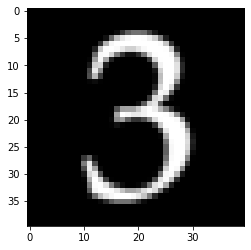

In [101]:
imgplot = plt.imshow(X[1109].reshape(40, 40), cmap='Greys')

In [102]:
one_hot_encoder = OneHotEncoder(sparse = False)
encoded = y.reshape(len(y), 1)
y_ohe = one_hot_encoder.fit_transform(encoded)
y_ohe = y_ohe.astype(np.uint8)

In [103]:
pos = 25
print(y[pos])
print(y_ohe[pos])

0
[1 0 0 0 0 0 0 0 0 0]


In [104]:
X = X.reshape(X.shape[0], 40, 40, 1)

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X, y_ohe, test_size=0.2, random_state=12345)

In [106]:
print(X_train.shape)
print(X_val.shape)

(2400, 40, 40, 1)
(600, 40, 40, 1)


In [107]:
IMG_HEIGHT = 28
IMG_WIDTH = 28

In [108]:
datagen = ImageDataGenerator(
    rotation_range = 0.15,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.1,
    zoom_range = (0.8, 1.2),
    fill_mode = 'constant')
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
datagen.fit(X_train)

In [109]:
model = Sequential([
    Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (40, 40,1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.1),
    Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    Dropout(0.2),
#     Conv2D(filters = 256, kernel_size = 3, activation = 'relu'),
#     Dropout(0.2),
    Flatten(),        
#     Dense(256, activation='relu', kernel_initializer='he_uniform'),
#     Dropout(0.3),    
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

In [110]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [111]:
ep = 50
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32), 
                    steps_per_epoch = len(X_train)/32, epochs = ep, 
                    validation_data = (X_val, y_val))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
75/75 [==============================] - ETA: 0s - loss: 5.9117 - accuracy: 0.1013WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E58A720CA8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

Text(0.5, 1.0, 'Training and Validation Loss')

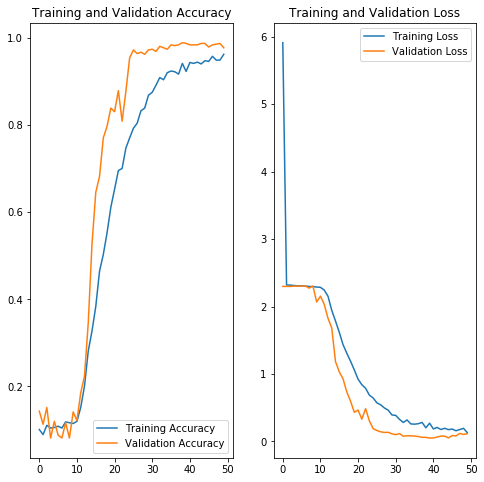

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(ep)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [1]:
model.save("Models\model_40x40.hdf5")

NameError: name 'model' is not defined